In [39]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering 

from scipy.stats import zscore

#----

from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points


In [40]:
df = pd.read_excel('Credit Card Customer Data.xlsx')

# Univariat, EDA, Bivariate Analysis

In [41]:
df.shape

(660, 7)

In [42]:
df.head(100)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
95,96,25742,5000,1,2,5,7
96,97,11937,18000,3,2,3,6
97,98,52736,15000,2,0,5,4
98,99,88338,13000,1,1,4,9


In [43]:
df.tail(100)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
560,561,35268,46000,6,3,1,0
561,562,11734,29000,7,5,0,2
562,563,88411,56000,7,3,0,1
563,564,96269,69000,5,4,1,0
564,565,87683,36000,7,4,0,0
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [45]:
df.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [46]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [47]:
df.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [48]:
df[df.duplicated(['Customer Key'], keep=False)]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
48,49,37252,6000,4,0,2,8
104,105,97935,17000,2,1,2,10
332,333,47437,17000,7,3,1,0
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
411,412,50706,44000,4,5,0,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


In [49]:
# Let us check any negatve values on each attributes
for i in list(df.columns):
    print (len(df[df[i] < 0]), "negative values in", i)
 

0 negative values in Sl_No
0 negative values in Customer Key
0 negative values in Avg_Credit_Limit
0 negative values in Total_Credit_Cards
0 negative values in Total_visits_bank
0 negative values in Total_visits_online
0 negative values in Total_calls_made


In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


Understanding the Dataset (Pre-Analysis and recommendation/s):
<ul>
<li>info() and dtypes() shows all attributes has Integer datatype.</li>
<li>isnull().sum() shows all attribtes has no null values.</i>
<li>shape functions shows 660 rows and 7 columns.</li>
<li>Attribute Sl_No is irrelevant, consider dropping it.</li>
<li>duplicate function shows duplication in the customer key; however the data content of the same customer key is entirely different from the other. This simply shows that although the data came from a single customer key, it can be considered as two seperate data which also can be considered as relevant data.</li>
<li>There are no negative values on each attributes. </li>
    </ul>

In [51]:
#dropping SI_NO attribute
df.drop(['Sl_No'],axis=1,inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 31.1 KB


Outliers Customer Key


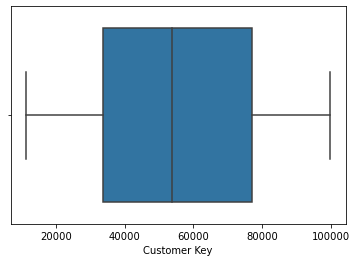

Outliers Avg_Credit_Limit


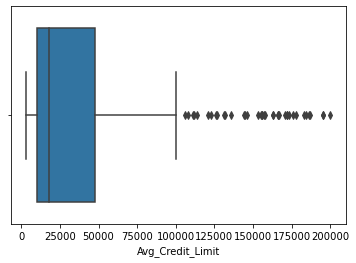

Outliers Total_Credit_Cards


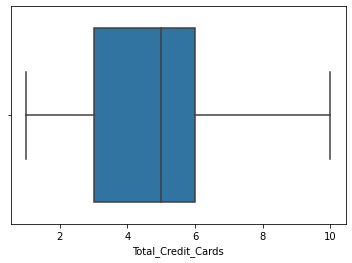

Outliers Total_visits_bank


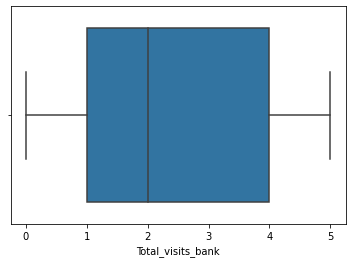

Outliers Total_visits_online


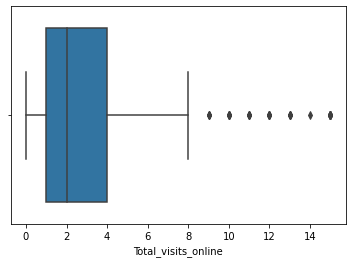

Outliers Total_calls_made


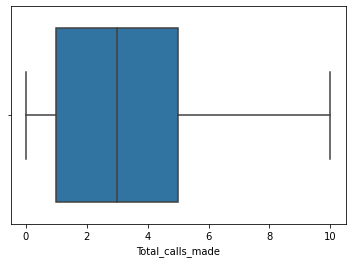

In [53]:
#Checking for Outliers

for feature in list(df.columns):
    print ("Outliers " + feature)
    sns.boxplot(x=df[feature])
    plt.show()

In [54]:
#Outliers Skewedness

for column in list(df):
    print (column, ":", df[column].skew())

Customer Key : 0.051461990601768696
Avg_Credit_Limit : 2.202395623436587
Total_Credit_Cards : 0.14487899029570606
Total_visits_bank : 0.14189601482438785
Total_visits_online : 2.2256067138726565
Total_calls_made : 0.6589053024181467


Displot Customer Key


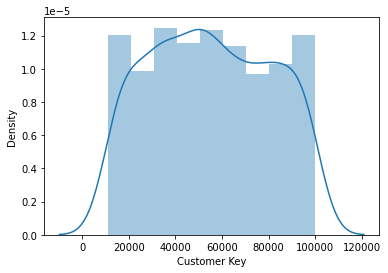

Displot Avg_Credit_Limit


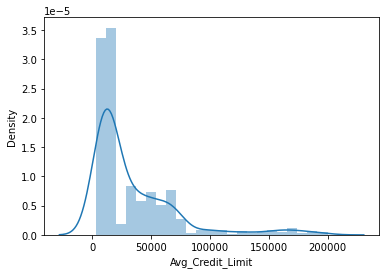

Displot Total_Credit_Cards


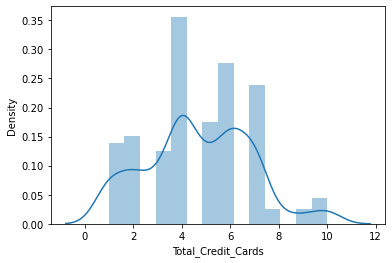

Displot Total_visits_bank


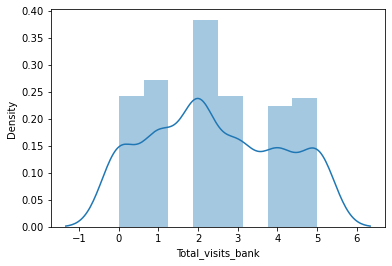

Displot Total_visits_online


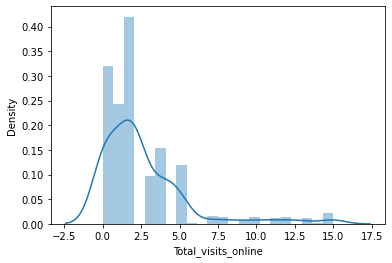

Displot Total_calls_made


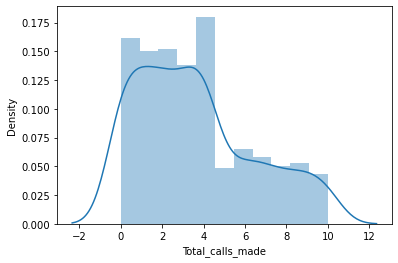

In [55]:
for feature in list(df.columns):
    print ("Displot " + feature)
    sns.distplot(df[feature], kde=True)
    plt.show()


Analysis:
<ul>
<li>Normally distributed data should be -1 and 1 skewness value. However, Avg_Credit_Limit has skewness value of 2.202395623436587 and Total_visits_online of 2.2256067138726565. This result implies that Avg_Credit_Limit and Total_visits_online are skewed because of its outliers. Therefore, perform Log Transformation Strategy for handling outliers</li>
    </ul>

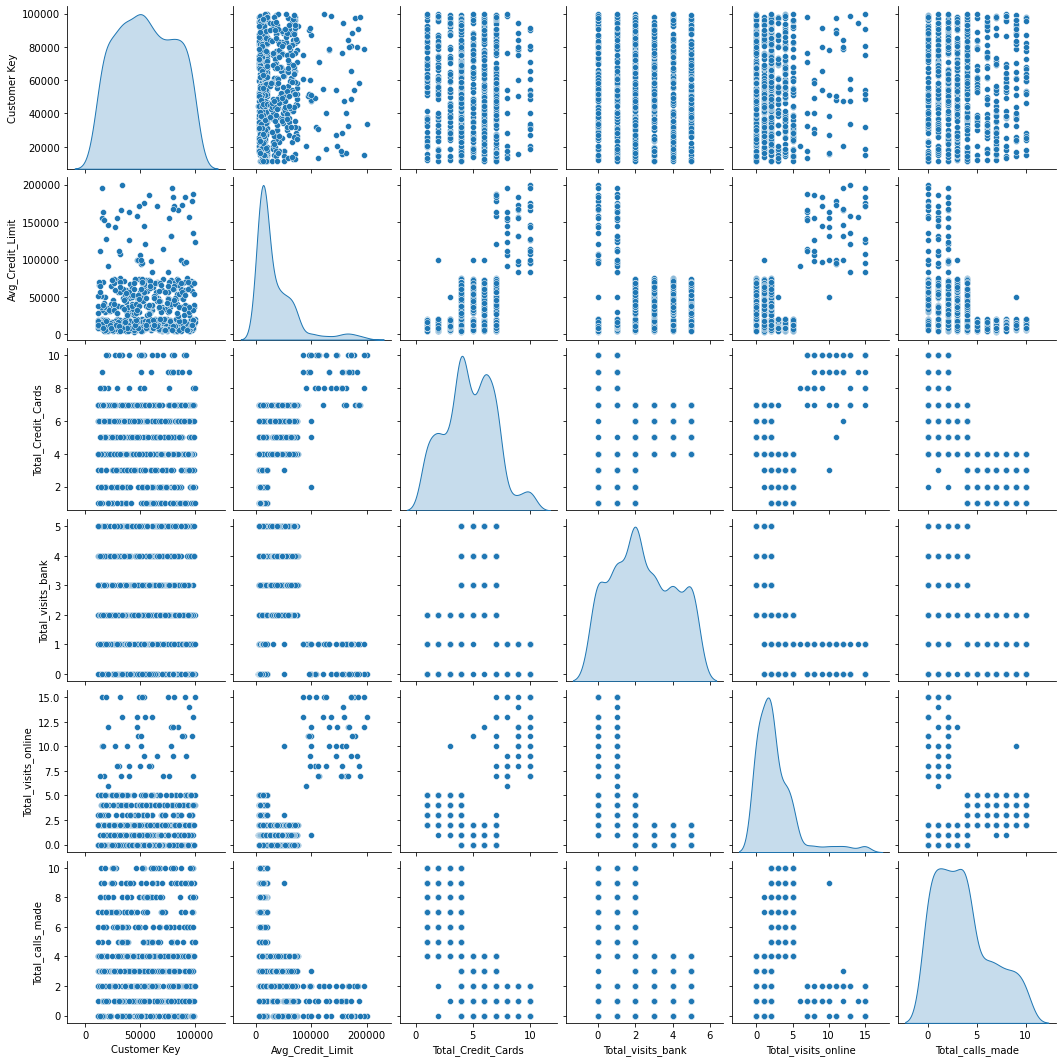

In [56]:
sns.pairplot(df,diag_kind='kde')
plt.show()

Analysis:
<ul>
<li>There is no strong linear relationship between any of the attributes in our dataset</li>
    </ul>

<AxesSubplot:>

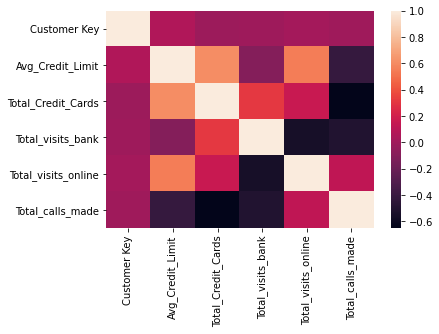

In [57]:
#Correlation using the Heatmap

correlation = df.corr()
sns.heatmap(correlation)

In [58]:
print (correlation)

                     Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
Customer Key             1.000000          0.068604           -0.010281   
Avg_Credit_Limit         0.068604          1.000000            0.608860   
Total_Credit_Cards      -0.010281          0.608860            1.000000   
Total_visits_bank       -0.000560         -0.100312            0.315796   
Total_visits_online      0.022506          0.551385            0.167758   
Total_calls_made         0.005968         -0.414352           -0.651251   

                     Total_visits_bank  Total_visits_online  Total_calls_made  
Customer Key                 -0.000560             0.022506          0.005968  
Avg_Credit_Limit             -0.100312             0.551385         -0.414352  
Total_Credit_Cards            0.315796             0.167758         -0.651251  
Total_visits_bank             1.000000            -0.551861         -0.506016  
Total_visits_online          -0.551861             1.000000          0.127

Analysis:
<ul>
    <li>Strong positive correlation of 0.59 can be seen between Avg_Credit_Limit and Total_Credit_Cards</li>
    <li>strong negative correlation of -0.651 can be seen between Total_calls_made and Total_Credit_Cards</li>
    <li>strong negative correlation of -0.632 can be seen between Total_visits_online and Total_visits_bank</li>
    </ul>

# K-Means

In [59]:
# Removing units from each attributes
dfScaled=df.apply(zscore)
dfScaledKmeans = dfScaled.copy()
dfScaledKmeans.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.246920,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,-0.653203,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,-1.476098,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.571901,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,-0.300857,1.740187,0.597334,-1.473731,3.202298,-0.203739


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

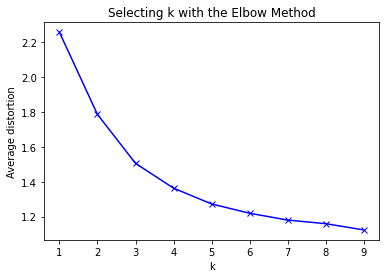

In [60]:
#Finding optimal no. of clusters

from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dfScaled)
    prediction=model.predict(dfScaled)
    meanDistortions.append(sum(np.min(cdist(dfScaled, model.cluster_centers_, 'euclidean'), axis=1)) / dfScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Analysis:
Perfect value appears to be 3 or 4 clusters, we will consider the 3 and 4 cluster.

In [61]:
#using 3 cluster

final_model=KMeans(3)
final_model.fit(dfScaled)
prediction=final_model.predict(dfScaled)
prediction_using_3 = prediction

#Append the prediction 
df["GROUP"] = prediction
dfScaled["GROUP"] = prediction
df.head(10)

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,87073,100000,2,1,1,0,1
1,38414,50000,3,0,10,9,0
2,17341,50000,7,1,3,4,1
3,40496,30000,5,1,1,4,1
4,47437,100000,6,0,12,3,2
5,58634,20000,3,0,1,8,0
6,48370,100000,5,0,11,2,2
7,37376,15000,3,0,1,1,0
8,82490,5000,2,0,2,2,0
9,44770,3000,4,0,1,7,0


In [62]:
#using 3 cluster

final_model=KMeans(4)
final_model.fit(dfScaled)
prediction=final_model.predict(dfScaled)
prediction_using_4 = prediction

#Append the prediction 
df["GROUP"] = prediction
dfScaled["GROUP"] = prediction
df.head(10)

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,87073,100000,2,1,1,0,2
1,38414,50000,3,0,10,9,0
2,17341,50000,7,1,3,4,1
3,40496,30000,5,1,1,4,1
4,47437,100000,6,0,12,3,3
5,58634,20000,3,0,1,8,0
6,48370,100000,5,0,11,2,3
7,37376,15000,3,0,1,1,0
8,82490,5000,2,0,2,2,0
9,44770,3000,4,0,1,7,0


# Analysis on the distribution of the data among the two groups K = 3 and  K=4 using Boxplot

In [63]:
dfKmeansClust = df.groupby(['GROUP'])
dfKmeansClust.mean()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,,
0,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536
1,35386.219626,30672.897196,5.453271,3.462617,1.014019,2.051402
2,79136.872093,37651.162791,5.593023,3.523256,0.941860,1.936047
3,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000


array([[<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Customer Key'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[GROUP]'>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

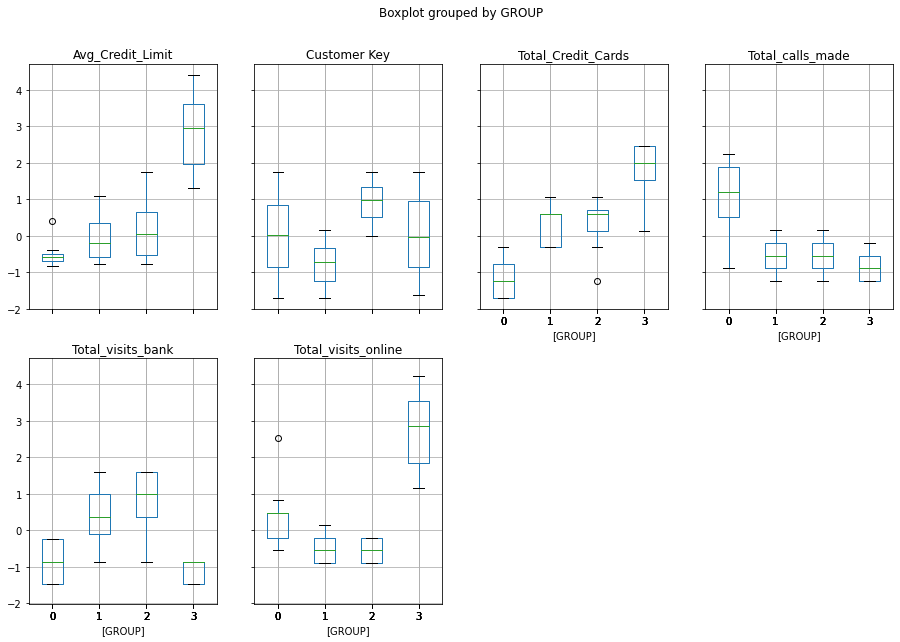

In [64]:
dfScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

# Hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff.

In [65]:
df=df.iloc[:,:-1]
dfScaled = df.apply(zscore)
dfScaled.head(10)

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.246920,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,-0.653203,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,-1.476098,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.571901,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,-0.300857,1.740187,0.597334,-1.473731,3.202298,-0.203739
5,0.136383,-0.387644,-0.787585,-1.473731,-0.547490,1.542593
6,-0.264423,1.740187,0.135694,-1.473731,2.861408,-0.553005
7,-0.693736,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271
8,1.067955,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005
9,-0.405002,-0.839808,-0.325946,-1.473731,-0.547490,1.193326


In [66]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [67]:
model.fit(dfScaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

In [68]:
df['labels'] = model.labels_
df.head(10)

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,87073,100000,2,1,1,0,0
1,38414,50000,3,0,10,9,2
2,17341,50000,7,1,3,4,0
3,40496,30000,5,1,1,4,0
4,47437,100000,6,0,12,3,1
5,58634,20000,3,0,1,8,2
6,48370,100000,5,0,11,2,1
7,37376,15000,3,0,1,1,2
8,82490,5000,2,0,2,2,2
9,44770,3000,4,0,1,7,2


In [69]:
dfCluster = df.groupby(['labels'])

In [70]:
dfCluster.mean()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,,
0,54874.821705,33736.434109,5.511628,3.485788,0.987080,2.005168
1,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000
2,55252.730942,12156.950673,2.403587,0.928251,3.556054,6.883408


In [71]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it to 1, the better is the clustering
# Average

Z = linkage(dfScaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(dfScaled))
c

0.8684228720933057

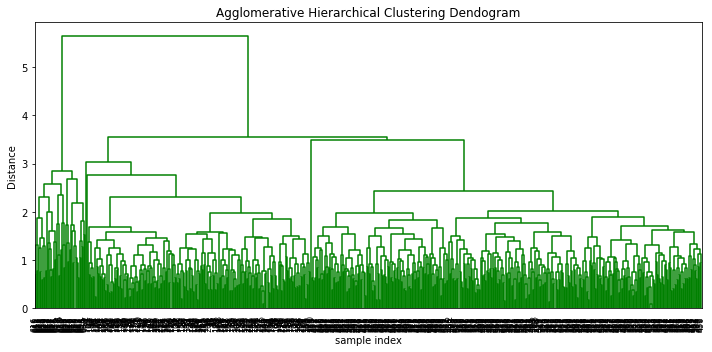

In [72]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

-----------------------------------------------------------------

In [73]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
# Complete

Z = linkage(dfScaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(dfScaled))
c

0.8333358686900459

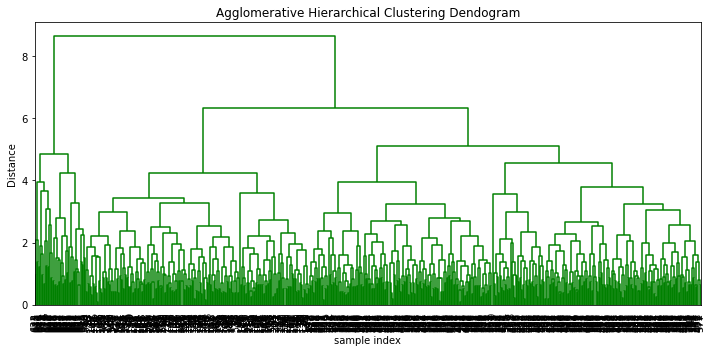

In [74]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

-----------------------------------------------------------------

In [75]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
# Ward

Z = linkage(dfScaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(dfScaled))
c

0.7067190998109724

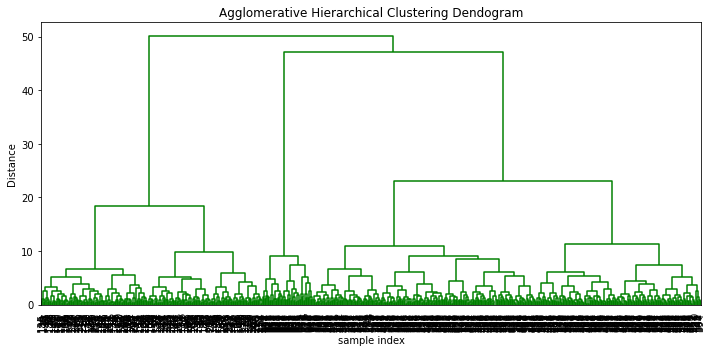

In [76]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

# Silhouette Score

In [79]:
print ('Silhouette Score(n=3) - KMeans:', silhouette_score(dfScaledKmeans, prediction_using_3))

Silhouette Score(n=3) - KMeans: 0.4177434852377372


In [81]:
print ('Silhouette Score(n=3)- KMeans:', silhouette_score(dfScaledKmeans, prediction_using_4))

Silhouette Score(n=3)- KMeans: 0.3226497344391236


In [82]:
print ('Silhouette Score(n=3)- Agglomerative:', silhouette_score(dfScaled, model.labels_))

Silhouette Score(n=3)- Agglomerative: 0.41787233963503095


-------------------------------

Analysis:

When using K-means, the silhouette score appears to be better for the 3 clusters. This output suggests that the datasets should have an optimal value of 3 clusters. 

In our agglomerative clustering, clustering appears to be continous. A decision should be made to choose the most significant and optimal cluster value.

The model presented the best result for the agglomerative clustering using the average linkage method as the cophenet index. Cophenet index average linkage method shows that the highest value amongst other cophenet index.
cophenet index.

The model also presented similar silhouette score for both Kmeans and agglomerative clusters of size 3.

The results of both the clustering are almost similar to the same dataset. It may be possible that when we have a very large dataset, the shape of clusters may differ a little. However, along with many similarities, these two techniques have some differences also.

Some important differences also to note:

1) We used "The Elbow method" in the case of KMeans to find the optimal number of clusters while in Hierarchical Clustering we used the Dendrogram

2) KMeans is centriod based while Hierarchical Clustering uses a Hierarchical/agglomerative approach